# Advance House Price Prediction

## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
train_id = train_df['Id']
test_id = test_df['Id']

In [7]:
train_df.drop('Id', axis=1, inplace=True)
test_df.drop('Id', axis=1, inplace=True)

In [8]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

## Exploratory Data Analysis
### Handle Missing Value

In [9]:
missing = X.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("Missing Values : \n", missing)

Missing Values : 
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


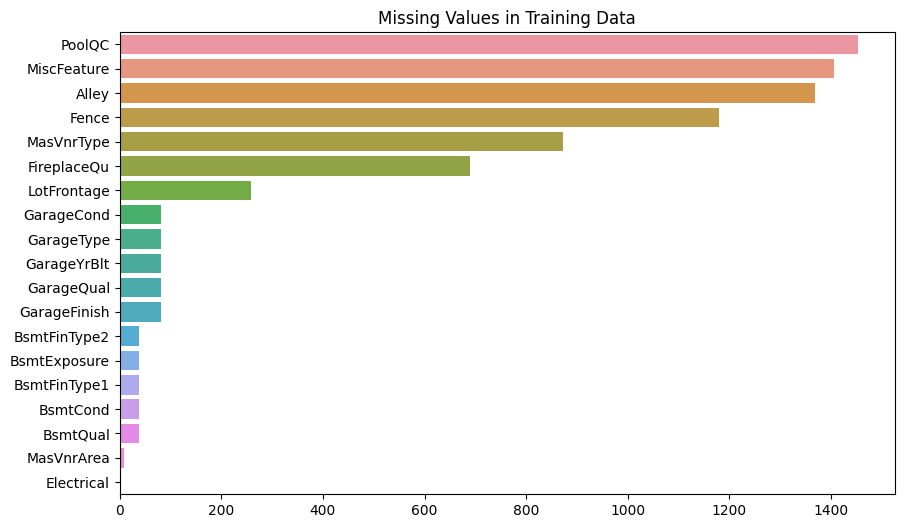

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Missing Values in Training Data")
plt.show()

#### Target Variable Distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


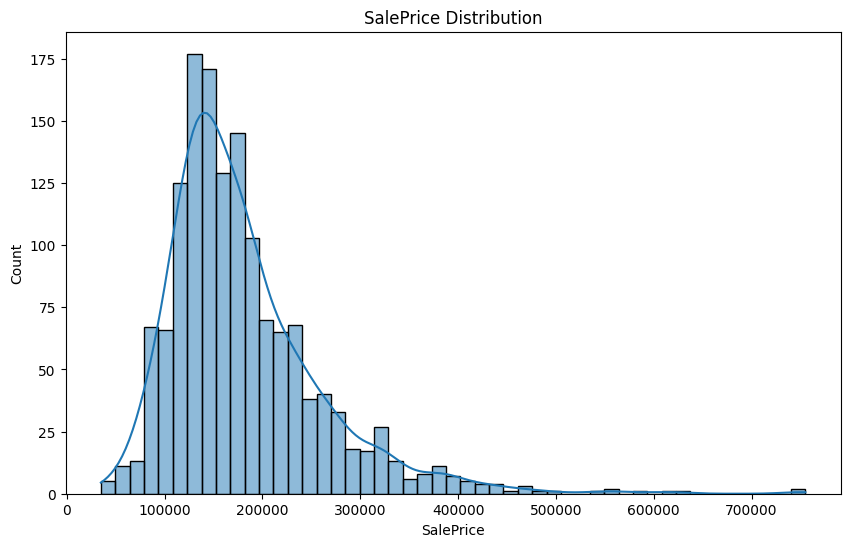

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('SalePrice Distribution')
plt.show()

Here, the plot show skewness to reduce the skewness we can use Log Transformation method

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


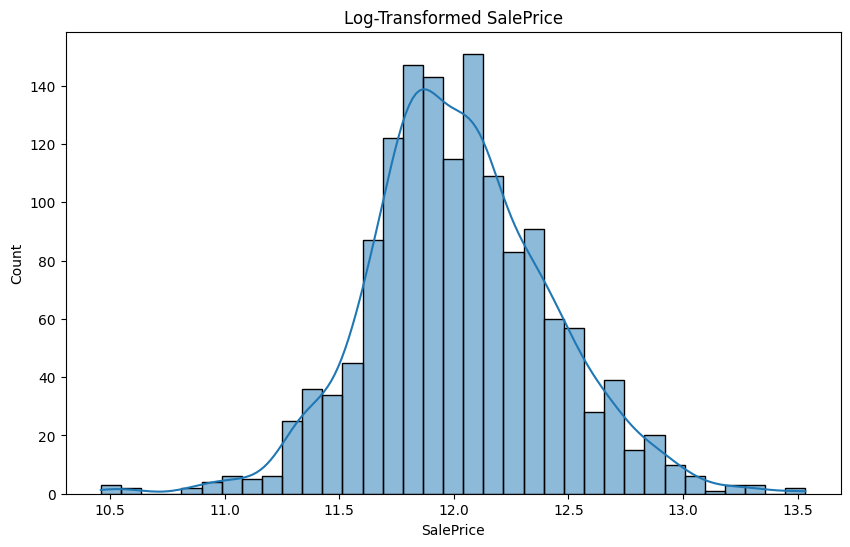

In [12]:
y_log = np.log1p(y)
plt.figure(figsize=(10,6))
sns.histplot(y_log, kde=True)
plt.title("Log-Transformed SalePrice")
plt.show()

#### Correlation Analysis

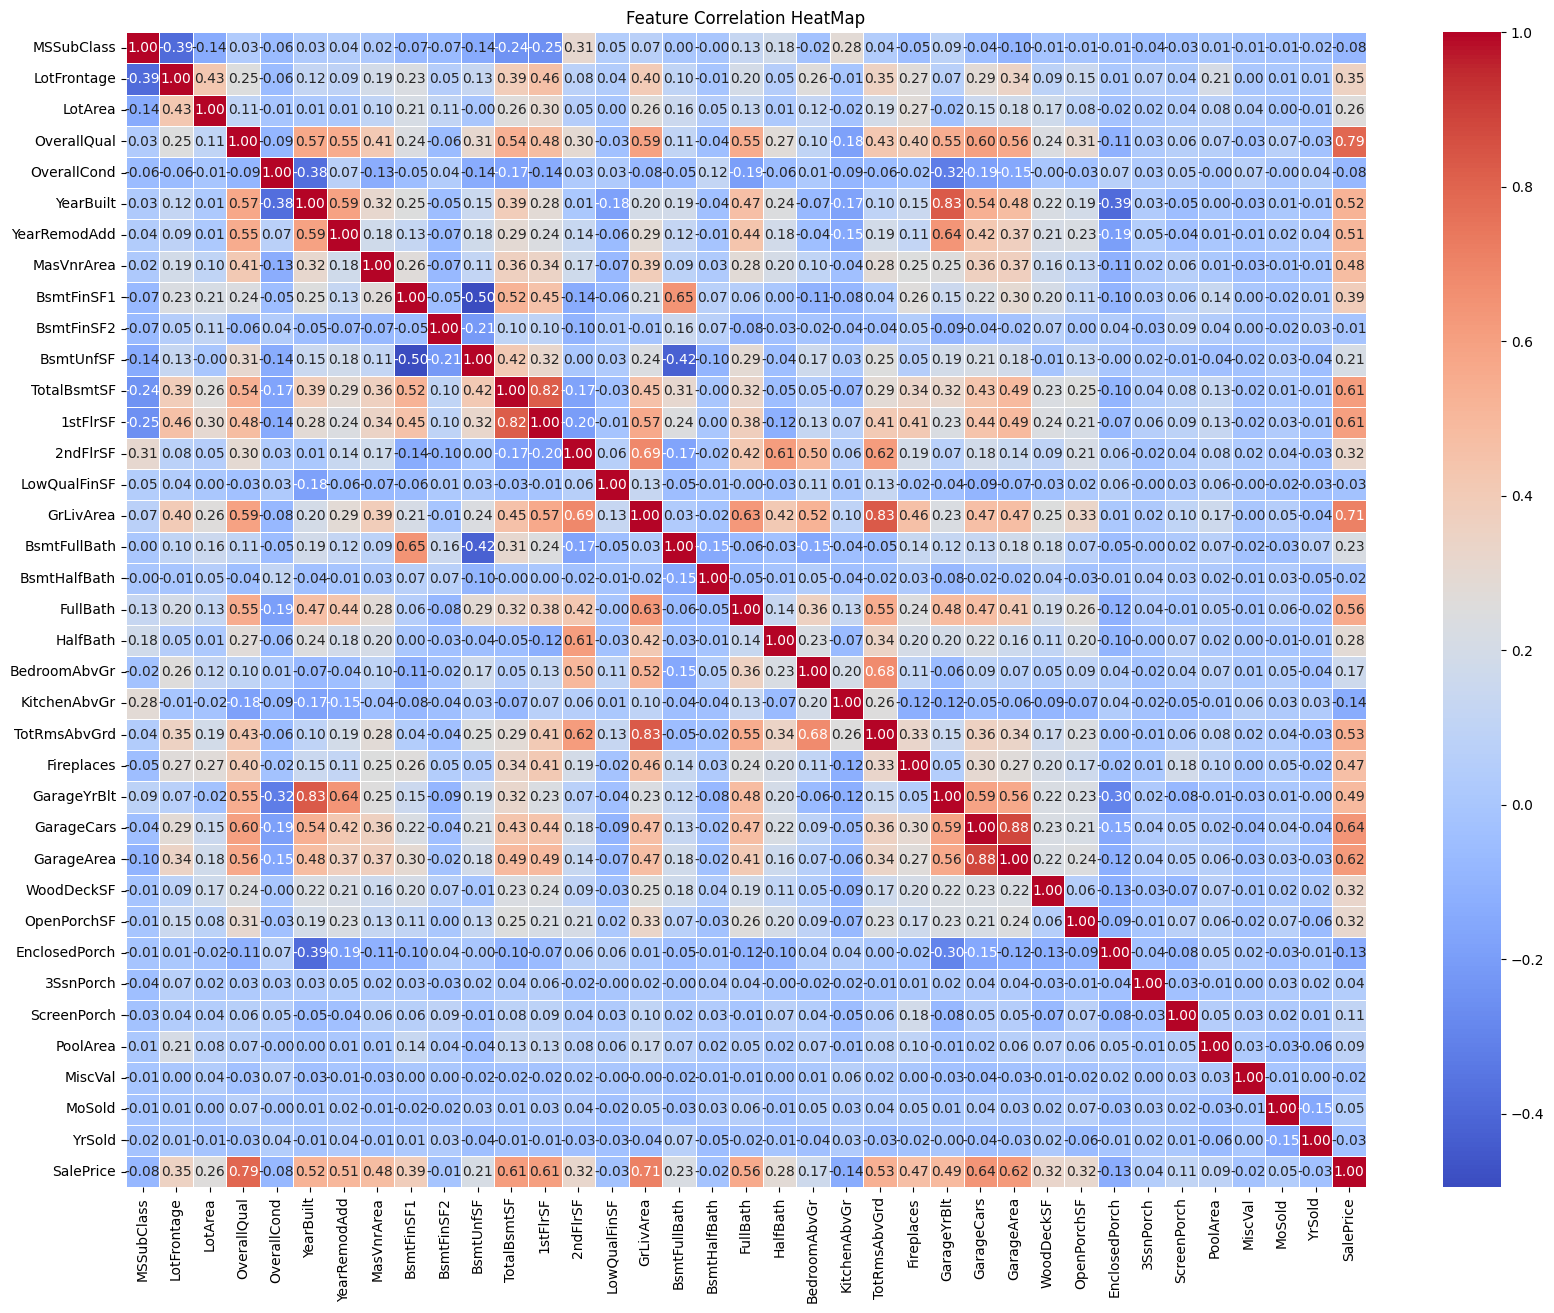

In [13]:
corr_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f',lw=0.5)
plt.title("Feature Correlation HeatMap")
plt.show()


In [14]:
# Top 10feature correlated with SalePrice
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(11)
print("Top Correlated Feature : \n", top_corr)

Top Correlated Feature : 
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


### Preprocessing

In [15]:
# Impute numerical feature with median
num_cols = X.select_dtypes(include=np.number).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

In [16]:
# Impute Cateorical Feature with mode

cat_cols = X.select_dtypes(include='object').columns
X[cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])

In [17]:
# Apply the imputation to test data
test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].median())
test_df[cat_cols] = test_df[cat_cols].fillna(test_df[cat_cols].mode().iloc[0])


In [18]:
# Filter out columns in cat_cols that do not exist in X or test_df
cat_cols = [col for col in cat_cols if col in X.columns and col in test_df.columns]

# Print the filtered categorical columns to ensure they're correct
print("Filtered categorical columns:", cat_cols)


Filtered categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [19]:
# Apply One-Hot Encoding on both train and test DataFrames
X = pd.get_dummies(X, columns=cat_cols)
test_df = pd.get_dummies(test_df, columns=cat_cols)

# Align the train and test DataFrames to make sure they have the same columns
X, test_df = X.align(test_df, join='left', axis=1, fill_value=0)

# Check the resulting shapes
print(f"Shape of X: {X.shape}")
print(f"Shape of test_df: {test_df.shape}")


Shape of X: (1460, 287)
Shape of test_df: (1459, 287)


#### Scaling Features

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_df)

## Model Training & Evaluation

#### Split Data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_log , test_size=0.2, random_state=42)


#### Train Models

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

models = {
    'Linear Regression':LinearRegression(),
    'SVM':SVR(kernel='rbf'),
    'Decision Tree':DecisionTreeRegressor(max_depth=5),
    'Random Forest':RandomForestRegressor(n_estimators=100, random_state=42)    
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[name] = rmse
    print(f"{name} : RMSE = {rmse:.4f} ")

Linear Regression : RMSE = 300502702971.3335 
SVM : RMSE = 0.2150 
Decision Tree : RMSE = 0.1998 
Random Forest : RMSE = 0.1462 


#### Model Comparison

               Model          RMSE
3      Random Forest  1.461919e-01
2      Decision Tree  1.998000e-01
1                SVM  2.150429e-01
0  Linear Regression  3.005027e+11


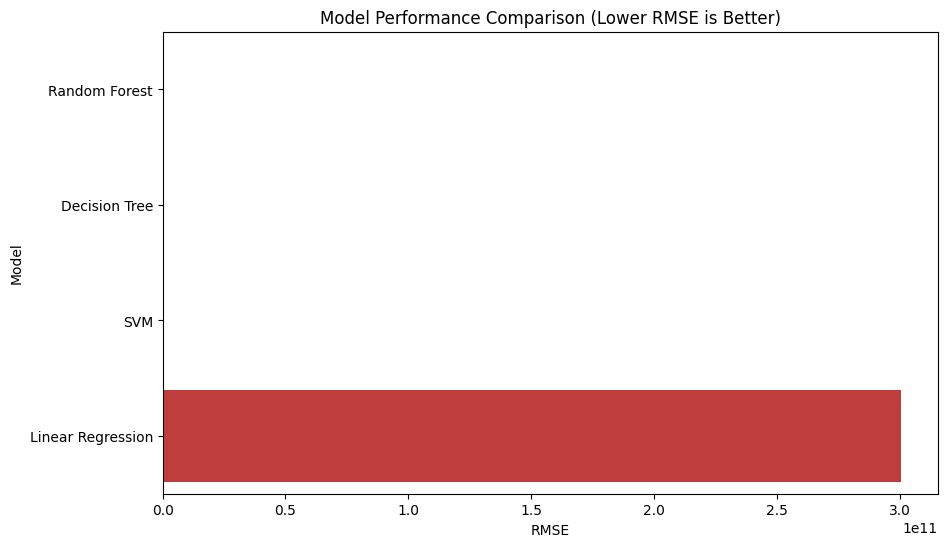

In [23]:
# Compare RMSE scores
results_df = pd.DataFrame(results.items(), columns=['Model', 'RMSE'])
results_df = results_df.sort_values(by='RMSE')
print(results_df)

# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df)
plt.title('Model Performance Comparison (Lower RMSE is Better)')
plt.show()

## Final Prediction & Submission

#### Select best Model

In [24]:
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_scaled, y_log)  # Train on full dataset

RandomForestRegressor(random_state=42)

#### Predict on Test Data

In [25]:
test_pred_log = best_model.predict(test_scaled)
test_pred = np.expm1(test_pred_log)  # Reverse log transformation

#### Save Submission File

In [26]:
submission = pd.DataFrame({'Id': test_id, 'SalePrice': test_pred})
submission.to_csv('submission.csv', index=False)

In [27]:
df = pd.read_csv("submission.csv")
df.head()

,Id,SalePrice
0,1461,123922.366733
1,1462,150455.852589
2,1463,181667.962572
3,1464,183696.736252
4,1465,199333.930780


In [28]:
df.shape

(1459, 2)